<a href="https://colab.research.google.com/github/PiYushZ8/Herth_disease_NLP/blob/main/AIML_Honours_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load dataset
!curl -L -o /content/medical-text.zip\
  https://www.kaggle.com/api/v1/datasets/download/chaitanyakck/medical-text

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11.5M  100 11.5M    0     0  22.2M      0 --:--:-- --:--:-- --:--:--  195M


In [ ]:
!unzip medical-text.zip

Archive:  medical-text.zip
replace test.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.dat                
replace train.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.dat               


In [ ]:
import pandas as pd

# Load train.dat
try:
    # Assuming train.dat has label and text separated by tab, but the first column might be label followed by text.
    # Let's try reading it without a separator first to inspect.
    # Then, we can parse it correctly.
    with open('train.dat', 'r') as f:
        lines = f.readlines()

    train_data = []
    for line in lines:
        # Assuming the first character is the label and the rest is the text, separated by a space or tab
        parts = line.strip().split('\t', 1) # Split only on the first tab
        if len(parts) == 2:
            train_data.append({'label': parts[0].strip(), 'text': parts[1].strip()})
        else:
             # If no tab, try splitting on the first space
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                 train_data.append({'label': parts[0].strip(), 'text': parts[1].strip()})
            else:
                print(f"Could not parse line: {line.strip()}")
                train_data.append({'label': None, 'text': line.strip()}) # Handle unparsable lines

    train_df = pd.DataFrame(train_data)
    print("Train data loaded successfully.")
    display(train_df.head())
except Exception as e:
    print(f"Error loading train.dat: {e}")

# Load test.dat
try:
    # Assuming test.dat just contains the text
    test_df = pd.read_csv('test.dat', sep='\t', header=None, names=['text'])
    print("\nTest data loaded successfully.")
    display(test_df.head())
except Exception as e:
    print(f"Error loading test.dat: {e}")

Train data loaded successfully.


,label,text
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,Subclavian artery to innominate vein fistula a...
4,4,Effect of local inhibition of gamma-aminobutyr...



Test data loaded successfully.


,text
0,Excision of limbal dermoids. We reviewed the c...
1,Bell's palsy. A diagnosis of exclusion. In cas...
2,Retained endobronchial foreign body removal fa...
3,Recurrent buccal space abscesses: a complicati...
4,Intracranial fibromatosis. Fibromatoses are un...


In [ ]:
# Perform basic EDA on train_df
print("Shape of train_df:", train_df.shape)

print("\nMissing values in train_df:")
print(train_df.isnull().sum())

print("\nData types in train_df:")
print(train_df.dtypes)

print("\nDistribution of 'label' in train_df:")
display(train_df['label'].value_counts())

# Perform basic EDA on test_df
print("\nShape of test_df:", test_df.shape)

print("\nMissing values in test_df:")
print(test_df.isnull().sum())

print("\nData types in test_df:")
print(test_df.dtypes)


Text Length Distribution in train_df:
count    14438.000000
mean      1229.666921
std        507.347039
min        169.000000
25%        849.000000
50%       1209.000000
75%       1588.000000
max       3998.000000
Name: text_length, dtype: float64

Text Length Distribution in test_df:
count    14442.000000
mean      1262.272469
std        525.401852
min        168.000000
25%        878.000000
50%       1237.000000
75%       1631.000000
max       3306.000000
Name: text_length, dtype: float64


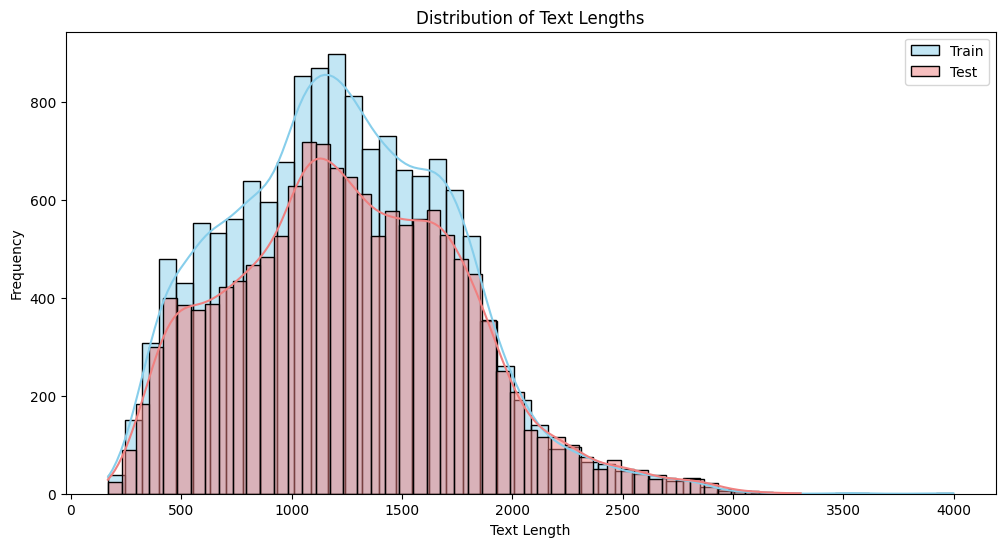


Most Common Words in Train Data (Overall):
[('the', 122496), ('of', 121285), ('and', 81967), ('in', 79379), ('with', 43935), ('a', 43526), ('to', 43080), ('patients', 34444), ('was', 28455), ('were', 24358), ('for', 21779), ('or', 15390), ('is', 14674), ('by', 14561), ('that', 14488), ('than', 13077), ('0', 12667), ('1', 10950), ('from', 10611), ('at', 9892)]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Function to get most common words
def get_most_common_words(text_list, num_words=20):
    all_words = ' '.join(text_list).lower()
    words = re.findall(r'\b\w+\b', all_words)
    # Remove stop words (optional but often helpful for text analysis)
    # from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    # words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

# Explore text length
train_df['text_length'] = train_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

print("\nText Length Distribution in train_df:")
print(train_df['text_length'].describe())

print("\nText Length Distribution in test_df:")
print(test_df['text_length'].describe())

# Visualize text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True, color='skyblue', label='Train')
sns.histplot(test_df['text_length'], bins=50, kde=True, color='lightcoral', label='Test')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Explore most common words in training data (overall)
common_words_train = get_most_common_words(train_df['text'].tolist())
print("\nMost Common Words in Train Data (Overall):")
print(common_words_train)

# You can also explore most common words per class if interested
# for label in train_df['label'].unique():
#     text_per_class = train_df[train_df['label'] == label]['text'].tolist()
#     common_words_class = get_most_common_words(text_per_class, num_words=10)
#     print(f"\nMost Common Words for Label {label}:")
#     print(common_words_class)

We see that the average length is around 1200-1260 characters for both training and test sets, with a significant standard deviation, indicating variability in document lengths. The minimum length is around 168-169 characters, and the maximum is around 3300-4000 characters.

The histogram visually confirms this distribution, showing that most abstracts fall within a certain range, but there are abstracts with both shorter and longer lengths. The distributions for the training and test sets look quite similar, which is good – it suggests the test data is representative of the training data in terms of text length.

The list of most common words shows that the most frequent terms are common English stop words like 'the', 'of', 'and', 'in', 'with', 'a', 'to', etc. These words are generally less informative for distinguishing between different medical categories and can be  removed during text preprocessing (e.g., using stop_words='english' in TfidfVectorizer).

Beyond stop words, we see terms like 'patients', 'was', 'were', 'for', 'or', 'is', 'by', 'that', 'than', and numbers like '0', '1'. Some of these might be relevant, while others like numbers or very common verbs might also be considered for removal or handled specifically depending on the analysis.

*   The text lengths are variable but follow a similar distribution in both datasets. This suggests that models which can handle variable-length input (like sequence models) or feature extraction methods that normalize for length (like TF-IDF) are appropriate.
*   The presence of many stop words in the most common words list indicates that removing them during preprocessing could potentially improve model performance by focusing on more discriminative terms.
*   The presence of numbers might be something to consider in preprocessing as well, depending on their relevance to the classification task.

This EDA helps us understand the nature of the text data and informs potential text preprocessing steps before building models.



In [ ]:
# Explore train_df
print("Shape of train_df:", train_df.shape)

print("\nMissing values in train_df:")
print(train_df.isnull().sum())

print("\nData types in train_df:")
print(train_df.dtypes)

print("\nDistribution of 'label' in train_df:")
display(train_df['label'].value_counts())

Shape of train_df: (14438, 2)

Missing values in train_df:
label    0
text     0
dtype: int64

Data types in train_df:
label    object
text     object
dtype: object

Distribution of 'label' in train_df:


,count
label,
5,4805
1,3163
4,3051
3,1925
2,1494


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS # Import standard English stop words

# Split train_df into training and validation sets
X = train_df['text']
y = train_df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

# Define custom stop words including the ones identified during EDA and standard English stop words
custom_stop_words = list(ENGLISH_STOP_WORDS) + ['patients', 'was', 'were', 'for', 'or', 'is', 'by', 'that', 'than', '0', '1']

# Initialize TF-IDF Vectorizer with custom stop words
# Fit on the training split
tfidf_vectorizer_split = TfidfVectorizer(max_features=5000, stop_words=custom_stop_words)
X_train_tfidf_split = tfidf_vectorizer_split.fit_transform(X_train)

# Transform the validation split
X_val_tfidf_split = tfidf_vectorizer_split.transform(X_val)

print("\nTF-IDF transformed training split shape:", X_train_tfidf_split.shape)
print("TF-IDF transformed validation split shape:", X_val_tfidf_split.shape)

# Initialize and train the Multinomial Naive Bayes model on the training split
model_split = MultinomialNB()
model_split.fit(X_train_tfidf_split, y_train)

print("\nModel trained on the training split.")

# Predict on the validation split
y_pred_val = model_split.predict(X_val_tfidf_split)

# Evaluate the model on the validation split
print("\nModel Evaluation on Validation Set:")
print(classification_report(y_val, y_pred_val))

Training set size: 11550
Validation set size: 2888

TF-IDF transformed training split shape: (11550, 5000)
TF-IDF transformed validation split shape: (2888, 5000)

Model trained on the training split.

Model Evaluation on Validation Set:
              precision    recall  f1-score   support

           1       0.70      0.77      0.74       633
           2       0.55      0.35      0.43       299
           3       0.55      0.34      0.42       385
           4       0.65      0.71      0.68       610
           5       0.49      0.55      0.52       961

    accuracy                           0.59      2888
   macro avg       0.59      0.55      0.56      2888
weighted avg       0.58      0.59      0.58      2888



*  The report shows the precision, recall, and F1-score for each of the five classes (1, 2, 3, 4, and 5).

*  You can see that the performance varies across classes. For example, Class 1 has relatively high precision (0.70), recall (0.77), and F1-score (0.74), while Class 2 and 3 have lower scores.

*  Class 5 has the highest support, and its performance metrics (precision 0.49, recall 0.55, F1-score 0.52) are moderate.

*  The overall accuracy of the model on the validation set is 0.59.

*  The macro average F1-score is 0.56, and the weighted average F1-score is 0.58.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
# Using the split data (X_train_tfidf_split, y_train) for training
logistic_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

logistic_model.fit(X_train_tfidf_split, y_train)

print("Logistic Regression model trained on the training split.")

# Predict on the validation split
y_pred_logistic = logistic_model.predict(X_val_tfidf_split)

# Evaluate the model on the validation split
print("\nLogistic Regression Model Evaluation on Validation Set:")
print(classification_report(y_val, y_pred_logistic))

Logistic Regression model trained on the training split.

Logistic Regression Model Evaluation on Validation Set:
              precision    recall  f1-score   support

           1       0.71      0.72      0.72       633
           2       0.52      0.41      0.46       299
           3       0.54      0.40      0.46       385
           4       0.67      0.64      0.65       610
           5       0.47      0.56      0.51       961

    accuracy                           0.58      2888
   macro avg       0.58      0.55      0.56      2888
weighted avg       0.58      0.58      0.57      2888



The report shows the performance metrics (precision, recall, F1-score) for each of the five classes (1, 2, 3, 4, and 5), along with the support (number of instances) for each class in the validation set.

Similar to the Naive Bayes model, the performance varies across classes.

- Class 1 has relatively good performance (precision 0.71, recall 0.72, F1-score 0.72).

- Classes 2 and 3 still have lower scores (e.g., Class 2 F1-score 0.46, Class 3 F1-score 0.46).

- Class 4 has moderate performance (precision 0.67, recall 0.64, F1-score 0.65).

- Class 5 has the highest support and shows moderate performance (precision 0.47, recall 0.56, F1-score 0.51).

- The overall accuracy of the Logistic Regression model on the validation set is 0.58.

- The macro average F1-score is 0.56, and the weighted average F1-score is 0.57.

Comparing Logistic Regression to Multinomial Naive Bayes the overall accuracy for both models is very similar (0.59 for Naive Bayes vs. 0.58 for Logistic Regression).

Looking at the class-specific metrics, the performance is also quite comparable across most classes. Logistic Regression seems slightly better for Class 1 (F1-score 0.72 vs 0.74), while Naive Bayes might be slightly better for Class 5 (F1-score 0.52 vs 0.51). The differences are not very large.

In this case, both models seem to perform similarly on the validation set with the current TF-IDF features and stop word removal.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Prepare data for deep learning model
# We need to convert text to sequences of integers and pad them

# Use the full training data for fitting the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>") # num_words is the max vocabulary size
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences to have the same length
max_length = 250 # You can adjust this based on text length distribution
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Define the model
embedding_dim = 16 # You can adjust this
model_dl = Sequential([
    Embedding(5000, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with number of classes
])

# Compile the model
model_dl.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_dl.summary()

# Train the model
num_epochs = 10 # You can adjust this
history = model_dl.fit(X_train_padded, y_train_encoded, epochs=num_epochs, validation_data=(X_val_padded, y_val_encoded), verbose=2)

# Evaluate the model on the validation set
loss, accuracy = model_dl.evaluate(X_val_padded, y_val_encoded, verbose=0)
print(f"\nDeep Learning Model Accuracy on Validation Set: {accuracy:.4f}")

# Note: For a full classification report, you would need to predict and use sklearn.metrics.classification_report
# y_pred_dl = model_dl.predict(X_val_padded)
# y_pred_classes_dl = np.argmax(y_pred_dl, axis=1)
# print("\nDeep Learning Model Evaluation on Validation Set:")
# print(classification_report(y_val_encoded, y_pred_classes_dl, target_names=label_encoder.classes_))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
361/361 - 3s - 8ms/step - accuracy: 0.3400 - loss: 1.5042 - val_accuracy: 0.4072 - val_loss: 1.4338
Epoch 2/10
361/361 - 2s - 4ms/step - accuracy: 0.4890 - loss: 1.2953 - val_accuracy: 0.5222 - val_loss: 1.2027
Epoch 3/10
361/361 - 3s - 7ms/step - accuracy: 0.5404 - loss: 1.1121 - val_accuracy: 0.5589 - val_loss: 1.1018
Epoch 4/10
361/361 - 3s - 8ms/step - accuracy: 0.5874 - loss: 0.9945 - val_accuracy: 0.5554 - val_loss: 1.0314
Epoch 5/10
361/361 - 4s - 11ms/step - accuracy: 0.6199 - loss: 0.9180 - val_accuracy: 0.5710 - val_loss: 1.0074
Epoch 6/10
361/361 - 2s - 5ms/step - accuracy: 0.6404 - loss: 0.8639 - val_accuracy: 0.5862 - val_loss: 0.9792
Epoch 7/10
361/361 - 2s - 5ms/step - accuracy: 0.6597 - loss: 0.8220 - val_accuracy: 0.5970 - val_loss: 0.9844
Epoch 8/10
361/361 - 2s - 5ms/step - accuracy: 0.6710 - loss: 0.7879 - val_accuracy: 0.5949 - val_loss: 0.9750
Epoch 9/10
361/361 - 2s - 7ms/step - accuracy: 0.6844 - loss: 0.7569 - val_accuracy: 0.5852 - val_loss: 0.9790
